### Introduction to linear regression:

* Linear regression is a statistical technique that is commonly used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting line that describes the relationship between the variables.

* Real-time example of linear regression is in the field of finance. A company may want to determine how its stock price is affected by various economic factors, such as interest rates, inflation, and GDP. By using linear regression, the company can estimate the impact of each factor on the stock price and make informed decisions about investment strategies.

### The key assumptions of linear regression include:

* **Linearity:** The relationship between the dependent variable and independent variables is linear.

* **Independence:** The observations are independent of each other.

* **Homoscedasticity:** The variance of the errors is constant across all levels of the independent variable.

* **Normality:** The errors are normally distributed.

* **No multicollinearity:** The independent variables are not highly correlated with each other.

These assumptions are important because violating them can lead to biased and unreliable results. Therefore, it is important to assess these assumptions before applying linear regression to real-world data.

### Data preparation and exploration

* Data preparation and exploration are crucial steps before performing any statistical analysis, including linear regression. 
* Example of how these steps can be applied in practice:

* Suppose a hospital wants to investigate the factors that affect patient length of stay (LOS). The hospital has collected data on the following variables for a sample of patients: age, gender, diagnosis, hospital admission type, insurance status, LOS, and hospital charges.

In [ ]:
import pandas as pd

# create a dictionary with the data
data = {
    'patient_id': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'age': [35, 45, 50, 30, 60],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'diagnosis': ['Heart Attack', 'Pneumonia', 'Broken Arm', 'Appendicitis', 'Stroke'],
    'admission_type': ['Emergency', 'Urgent', 'Elective', 'Emergency', 'Elective'],
    'insurance_type': ['Private', 'Medicare', 'Medicaid', 'Private', 'Medicare'],
    'hospital_charges': [5000, 10000, 7500, 15000, 20000],
    'length_of_stay': [3, 5, 2, 4, 6]
}

# create the dataframe
hospital_charges = pd.DataFrame(data)

# view the dataframe
print(hospital_charges)


  patient_id  age  gender     diagnosis admission_type insurance_type  \
0       P001   35    Male  Heart Attack      Emergency        Private   
1       P002   45  Female     Pneumonia         Urgent       Medicare   
2       P003   50    Male    Broken Arm       Elective       Medicaid   
3       P004   30  Female  Appendicitis      Emergency        Private   
4       P005   60    Male        Stroke       Elective       Medicare   

   hospital_charges  length_of_stay  
0              5000               3  
1             10000               5  
2              7500               2  
3             15000               4  
4             20000               6  


#### Explore the structure and summary of the data

The hospital can use the `str` and `summary` functions to explore the structure and summary statistics of the data.

In [ ]:
# View the structure of the data
print(hospital_charges.info())

# View the summary statistics of the data
print(hospital_charges.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patient_id        5 non-null      object
 1   age               5 non-null      int64 
 2   gender            5 non-null      object
 3   diagnosis         5 non-null      object
 4   admission_type    5 non-null      object
 5   insurance_type    5 non-null      object
 6   hospital_charges  5 non-null      int64 
 7   length_of_stay    5 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 448.0+ bytes
None
             age  hospital_charges  length_of_stay
count   5.000000          5.000000        5.000000
mean   44.000000      11500.000000        4.000000
std    11.937336       6020.797289        1.581139
min    30.000000       5000.000000        2.000000
25%    35.000000       7500.000000        3.000000
50%    45.000000      10000.000000        4.000000
75%    50.000000      1

Overview of the number of observations, variable types, and summary statistics of the variables.

#### Check for missing values, outliers, and other anomalies

The hospital also needs to check for any missing values, outliers, or other anomalies that may affect the results of the analysis. This can be done using the isnull, value_counts, and boxplot functions.

patient_id          0
age                 0
gender              0
diagnosis           0
admission_type      0
insurance_type      0
hospital_charges    0
length_of_stay      0
dtype: int64
35    1
45    1
50    1
30    1
60    1
Name: age, dtype: int64


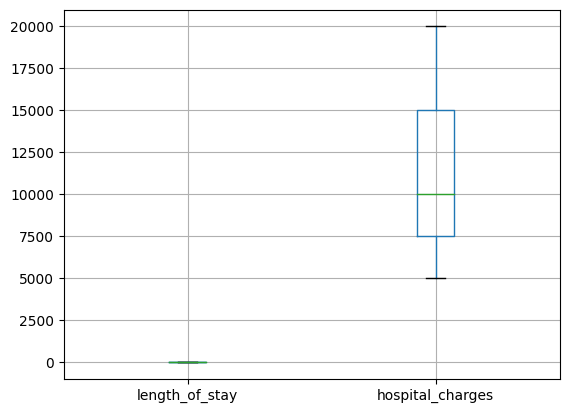

In [ ]:
# Check for missing values
print(hospital_charges.isnull().sum())

# Check for outliers in LOS and hospital charges
hospital_charges.boxplot(column=['length_of_stay', 'hospital_charges'])

# Check the distribution of age
print(hospital_charges['age'].value_counts())

With the help the hospital identify any missing values, outliers, or other anomalies that may need to be addressed before performing linear regression analysis.

By following these steps, the hospital can ensure that the data is clean and ready for linear regression analysis, which will help them identify the factors that affect patient LOS and improve their patient care strategies.

### Simple linear regression

* Simple linear regression is a statistical technique used to model the linear relationship between a dependent variable (Y) and a single independent variable (X). The equation for simple linear regression is:

                                       Y = β0 + β1X + ε

* where Y is the dependent variable, X is the independent variable, β0 is the intercept, β1 is the slope, and ε is the error term.

#### Define simple linear regression and its key components:

The key components of a simple linear regression model are:

* **Dependent variable:** This is the variable being predicted or modeled by the independent variable.
* **Independent variable:** This is the variable used to predict the dependent variable.
* **Regression equation:** A linear equation that models the relationship between the dependent and independent variables.
* **Coefficients:** the slope and intercept of the regression equation.
* **Residuals:** the difference between the predicted and actual values of the dependent variable.

To fit a simple linear regression model in Python, we can use the lm function from the statsmodels library.

In [ ]:
import statsmodels.api as sm
# create a linear regression model
y, X = dmatrices('length_of_stay ~ hospital_charges', data=hospital_charges, return_type='dataframe')
model = sm.OLS(y, X)

# fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         length_of_stay   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     4.909
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.114
Time:                        17:22:13   Log-Likelihood:                -6.4041
No. Observations:                   5   AIC:                             16.81
Df Residuals:                       3   BIC:                             16.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6207      1.186  

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


* Above example, we're using length_of_stay as the independent variable and hospital_charges as the dependent variable. The add_constant function is used to add an intercept term to the regression equation. The OLS function is used to fit the model, and the summary method is used to print the model summary.

* The output of the model includes several components, including the coefficients, standard error, t-value, and p-value. The coefficient for length_of_stay represents the slope of the regression line, and the intercept represents the point where the line intersects the y-axis. The standard error represents the average amount that the predicted values deviate from the actual values, and the t-value and p-value test the significance of the coefficients. The R-squared value represents the proportion of variance in the dependent variable that is explained by the independent variable.

#### Evaluate the model's goodness of fit using the R-squared value and residual plots.

* To evaluate the model's goodness of fit, we can look at the R-squared value and residual plots. An R-squared value close to 1 indicates a good fit, while residual plots can help identify patterns in the residuals that suggest the model may be misspecified.

#### Test the significance of the F-test.



* To test the significance of the F-test, we need to check the p-value associated with the F-statistic. If the p-value is less than the level of significance (typically 0.05), we can reject the null hypothesis and conclude that the linear regression model is significant.

* We can print the p-value associated with the F-statistic using the following code:
print("p-value:", p_val)

* If the p-value is less than 0.05, we can reject the null hypothesis and conclude that the linear regression model is significant. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the linear regression model is not significant.

### Multiple linear regression

* Multiple linear regression is a statistical technique used to predict a dependent variable based on multiple independent variables. In other words, it allows us to study the relationship between a dependent variable and two or more independent variables simultaneously.

#### Define multiple linear regression and its key components.

The key components of a multiple linear regression model include:

* **Dependent variable:** This is the variable that is being predicted by the model. It is also referred to as the response variable or outcome variable.

* **Independent variables:** These are the variables that are used to predict the dependent variable. They are also referred to as predictor variables or explanatory variables.

* **Coefficients:** These are the values that represent the slope of the line for each independent variable in the regression equation. They indicate the change in the dependent variable for a one-unit increase in the independent variable, while holding all other variables constant.

* **Standard error:** This is the measure of the variability of the regression coefficients. It is used to calculate the t-value and p-value.

* **t-value:** This is the ratio of the coefficient to its standard error. It indicates how statistically significant the coefficient is.

* **p-value:** This is the probability that the coefficient is equal to zero. It indicates the statistical significance of the coefficient.

* **R-squared value:** This is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables.

In [ ]:
import statsmodels.formula.api as smf

# fit the multiple linear regression model
model = smf.ols(formula='length_of_stay ~ age + hospital_charges', data=hospital_charges).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         length_of_stay   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     1.676
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.374
Time:                        17:41:10   Log-Likelihood:                -6.3663
No. Observations:                   5   AIC:                             18.73
Df Residuals:                       2   BIC:                             17.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2418      2.607  

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


* Above output of the model includes the coefficients, standard error, t-value, and p-value for each independent variable, as well as the R-squared value for the overall model. We can use this information to interpret the significance of each variable and the overall fit of the model.

* To evaluate the goodness of fit of the model, we can look at the R-squared value, which tells us how much of the variation in the dependent variable is explained by the independent variables. We can also examine residual plots to check for any patterns or trends that may indicate that the model is not a good fit for the data.

* To test the significance of the model, we can use the F-test, which compares the variance explained by the model to the variance not explained by the model. The null hypothesis for the F-test is that all the coefficients in the model are equal to zero, which means that the independent variables do not have a significant effect on the dependent variable. The alternative hypothesis is that at least one of the coefficients is not equal to zero, which means that the independent variables have a significant effect on the dependent variable. We can use the "anova_lm" function from the "statsmodels" package to perform the F-test.

### Let's discuss the difference between correlation and regression.


Correlation and regression are two statistical concepts used to analyze the relationship between two or more variables. However, they are different in several ways:

* **Definition**: Correlation measures the degree of association or relationship between two variables. Regression, on the other hand, is a statistical method used to estimate the strength and direction of the relationship between a dependent variable and one or more independent variables.

* **Objective**: The primary objective of correlation is to determine the direction and strength of the relationship between two variables. Regression, on the other hand, is used to predict the value of the dependent variable based on the value of the independent variable.

* **Output**: The output of correlation is a correlation coefficient, which ranges from -1 to +1. The sign of the coefficient indicates the direction of the relationship (positive or negative), while the magnitude indicates the strength of the relationship (strong or weak). The output of regression is an equation that represents the relationship between the dependent and independent variables.

* **Causation**: Correlation does not imply causation, meaning that just because two variables are correlated does not mean that one causes the other. Regression, on the other hand, can be used to determine causation, but only under certain conditions and assumptions.

* **Applications**: Correlation is commonly used in research to determine the strength and direction of the relationship between variables, while regression is used in prediction modeling, forecasting, and machine learning applications to predict future outcomes based on past data.

> Correlation measures the degree of association between variables, while regression is used to predict the value of one variable based on the value of another variable.

### What do you mean by regression, Why regression is important?

Regression analysis is an important statistical tool used to analyze the relationship between a dependent variable and one or more independent variables. Regression is used extensively in various fields, including economics, finance, engineering, social sciences, and machine learning. 

Here are some reasons why regression is important:

* **Prediction**: Regression analysis can be used to predict future values of the dependent variable based on the values of the independent variables. This is useful in many applications, such as forecasting sales, estimating future trends, and predicting future demand for products and services.

* **Relationship Analysis**: Regression analysis can be used to determine the strength and direction of the relationship between the dependent and independent variables. This helps in understanding how changes in the independent variables affect the dependent variable.

* **Model Building**: Regression analysis can be used to develop models that can be used to predict the value of the dependent variable based on the values of the independent variables. These models can be used for decision-making, planning, and forecasting.

* **Variable Selectio**n: Regression analysis can be used to select the most important variables that affect the dependent variable. This helps in eliminating variables that do not have a significant impact on the dependent variable, thus reducing the complexity of the model.

* **Hypothesis Testing**: Regression analysis can be used to test hypotheses about the relationship between the dependent and independent variables. This helps in determining whether the relationship is statistically significant or not.

* **Control**: Regression analysis can be used to control for the effects of other variables that may be affecting the dependent variable. This helps in isolating the effects of the independent variables on the dependent variable.

> It is widely used in various fields to analyze and understand the relationship between variables and make predictions about future outcomes.

[Quick recap](https://medium.com/@cmukesh8688/evaluation-of-linear-regression-model-6e8edbb068f)

### **Happy learing**🙂